# 07 漸近展開の有名な例

黒木玄

2018-05-20～2019-04-03, 2023-06-22

* Copyright 2018,2023 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT
* Repository: https://github.com/genkuroki/Calculus

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/07%20example%20of%20asymptotic%20expansion.ipynb

* https://genkuroki.github.io/documents/Calculus/07%20example%20of%20asymptotic%20expansion.pdf

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* [WindowsへのJulia言語のインストール](http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f)

* [Julia v1.1.0 の Windows 8.1 へのインストール](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/install.ipynb)

を参照せよ. 前者は古く, 後者の方が新しい.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#漸近展開の有名な例" data-toc-modified-id="漸近展開の有名な例-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>漸近展開の有名な例</a></span><ul class="toc-item"><li><span><a href="#$F_n(x)$-の定義" data-toc-modified-id="$F_n(x)$-の定義-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>$F_n(x)$ の定義</a></span></li><li><span><a href="#$F_n(x)-=-O(x^{n+1})$" data-toc-modified-id="$F_n(x)-=-O(x^{n+1})$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>$F_n(x) = O(x^{n+1})$</a></span></li><li><span><a href="#$F_0(x)$-の漸近展開" data-toc-modified-id="$F_0(x)$-の漸近展開-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>$F_0(x)$ の漸近展開</a></span></li><li><span><a href="#$F_0(x)$-の漸近展開の別の導出の仕方" data-toc-modified-id="$F_0(x)$-の漸近展開の別の導出の仕方-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>$F_0(x)$ の漸近展開の別の導出の仕方</a></span></li><li><span><a href="#以上のまとめ" data-toc-modified-id="以上のまとめ-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>以上のまとめ</a></span></li><li><span><a href="#$F_0(1/10)$-の漸近展開を用いた数値計算" data-toc-modified-id="$F_0(1/10)$-の漸近展開を用いた数値計算-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>$F_0(1/10)$ の漸近展開を用いた数値計算</a></span></li><li><span><a href="#漸近展開の入門書" data-toc-modified-id="漸近展開の入門書-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>漸近展開の入門書</a></span></li><li><span><a href="#指数積分函数" data-toc-modified-id="指数積分函数-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>指数積分函数</a></span></li><li><span><a href="#連分数展開による数値計算" data-toc-modified-id="連分数展開による数値計算-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>連分数展開による数値計算</a></span></li></ul></li></ul></div>

In [1]:
using Base.MathConstants
using Base64
using Printf
using Statistics
const e = ℯ
endof(a) = lastindex(a)
linspace(start, stop, length) = range(start, stop, length=length)

using Plots
#gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
#clibrary(:misc)
default(fmt=:png)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy.init_printing(order="lex") # default
#sympy.init_printing(order="rev-lex")

using SpecialFunctions
using QuadGK

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

## 漸近展開の有名な例

### $F_n(x)$ の定義

$n$ は非負の整数であるとする. $x>0$ の函数 $F_n(x)$ を

$$
F_n(x) = n!\,e^{1/x}\int_{1/x}^\infty e^{-t} t^{-n-1}\,dt
$$

と定める.  $F_n(x)$ の $x>0$ が $0$ に近いときの様子を調べたい.

### $F_n(x) = O(x^{n+1})$

$x>0$ のとき $t\geqq 1/x$ ならば $t^{-n-1}\leqq x^{n+1}$ なので

$$
0 < F_n(x) \leqq n!\,e^{1/x}\int_{1/x}^\infty e^{-t}x^{n+1}\,dt = n!\, x^{n+1}.
$$

ゆえに,

$$
F_n(x) = O(x^{n+1}) \quad (x\searrow 0).
$$

### $F_0(x)$ の漸近展開

$(-e^{-t})'=e^{-t}$ を用いた部分積分によって

$$
\begin{aligned}
F_n(x) &= n!\,e^{1/x}\left(
\left[-e^{-t}t^{-n-1}\right]_{1/x}^\infty + \int_{1/x}^\infty e^{-t}(-(n+1)t^{-n-2})dt
\right)
\\ &=
n!\,x^{n+1} - F_{n+1}(x).
\end{aligned}
$$

ゆえに $x>0$ において, 

$$
\begin{aligned}
F_0(x) &= 0!\,x - F_1(x) =
0!\,x - 1!\,x^2 + F_2(x) = \cdots 
\\ &=
0!\,x - 1!\,x^2 + \cdots + (-1)^n n! x^{n+1} + (-1)^{n+1} F_{n+1}(x) 
\\ &=
\sum_{k=0}^n (-1)^k k!\, x^{k+1} + (-1)^{n+1} F_{n+1}(x).
\end{aligned}
$$

### $F_0(x)$ の漸近展開の別の導出の仕方

$x>0$ であるとする. $F_0(x)$ は $t=1/x+u$ という置換によって次のように書き直される:

$$
F_0(x) = e^{1/x}\int_{1/x}^\infty \frac{e^{-t}}{t}\,dt =
x\int_0^\infty \frac{e^{-u}}{1+xu}\,du.
$$

ゆえに

$$
\frac{1}{1+z} = \sum_{k=0}^{n-1}(-1)^k z^k + (-1)^n\frac{z^n}{1+z}
$$

を $z=xu$ に適用した結果を使うと, 

$$
\begin{aligned}
F_0(x) &= \sum_{k=0}^{n-1} (-1)^k x^{k+1}\int_0^\infty e^{-u}u^k\,du + 
(-1)^n x^{n+1}\int_0^\infty \frac{e^{-u}u^n}{1+xu}\,du
\\ &=
\sum_{k=0}^{n-1} (-1)^k k! x^{k+1} + 
(-1)^n x^{n+1}\int_0^\infty \frac{e^{-u}u^n}{1+xu}\,du.
\end{aligned}
$$

さらに

$$
0 < x^{n+1}\int_0^\infty \frac{e^{-u}u^n}{1+xu}\,du \leqq 
x^{n+1}\int_0^\infty e^{-u}u^n\,du = n!\,x^{n+1}
$$

なので

$$
x^{n+1}\int_0^\infty \frac{e^{-u}u^n}{1+xu}\,du = O(x^{n+1}) \qquad(x\searrow 0).
$$

### 以上のまとめ

以上をまとめると

$$
F_0(x) = \sum_{k=0}^{n-1} (-1)^k k!\, x^{k+1} + (-1)^n F_n(x) =
\sum_{k=0}^{n-1}(-1)^k k!\,x^{k+1} + O(x^{n+1}) \quad (x\searrow 0).
$$

ここで

$$
F_n(x) = n!e^{1/x}\int_{1/x}^\infty e^{-t}t^{-n-1}\,dt =
x^{n+1}\int_0^\infty \frac{e^{-u}u^n}{1+xu}\,du = O(x^{n+1})
\quad(x\searrow 0).
$$

しかし, $x>0$ で

$$
\sum_{k=0}^\infty (-1)^k k!\, x^{k+1} =
0!\,x - 1!\,x^2 + 2!\,x^3 - 3!\,x^4 + \cdots
$$

は決して収束しない. 

このように全てを足し上げると発散する場合であっても, 有限項と剰余項の和の形式で表わせば, すべてがwell-definedな量だけを使って議論を進めることができる場合がある. 上の場合には剰余項は $(-1)^n F_n(x)$ である.

### $F_0(1/10)$ の漸近展開を用いた数値計算

$x>0$ のとき $0<F_n(x)\leqq n!\,x^{n+1}$ となるのであった. $x=1/10$ のとき $n!\,x^{n+1}$ が最小になる $n$ は $n=9,10$ であることを確認できる. そのとき $n!\,x^{n+1} = 3.6288\times10^{-5}$ である.  したがって, $n=9,10$ のときの $\ds\sum_{k=0}^{n-1} (-1)^k k!\, x^{k+1}$ による $F_0(x)$ の近似は最良になると予想される.

In [3]:
[(n, factorial(n)*(1/10)^(n+1)) for n in 7:13]

7-element Vector{Tuple{Int64, Float64}}:
 (7, 5.0400000000000026e-5)
 (8, 4.032000000000002e-5)
 (9, 3.628800000000002e-5)
 (10, 3.628800000000002e-5)
 (11, 3.991680000000003e-5)
 (12, 4.790016000000003e-5)
 (13, 6.227020800000005e-5)

Y = F₀(1 / 10) = 0.09156333393978829
Y_ae9 = F₀_ae(1 / 10, 9) = 0.09158192
Y_ae10 = F₀_ae(1 / 10, 10) = 0.091545632


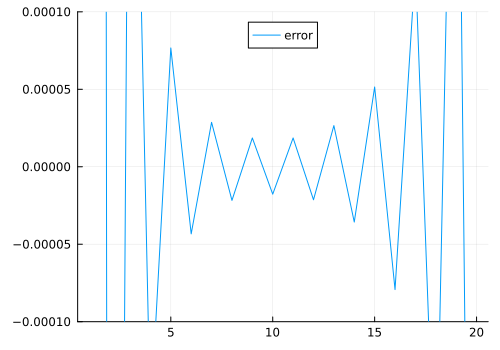

In [4]:
F₀(x) = exp(1/x)*quadgk(u->exp(-1/(x*u))/u, 0, 1)[1]
F₀_ae(x, n=10) = sum(k->(-1)^k*factorial(k)*x^(k+1), 0:n-1)

@show Y = F₀(1/10)
@show Y_ae9 = F₀_ae(1/10, 9)
@show Y_ae10 = F₀_ae(1/10, 10)

n = 1:20
plot(size=(500,350))
plot!(ylims=(-0.0001,0.0001))
plot!(legend=:top)
plot!(n, F₀_ae.(1/10, n) .- Y, label="error")

### 漸近展開の入門書

このように $x > 0$ で決して収束しないべき級数であっても, 適切な解釈のもとで数学的に十分な意味を持つことがある.  このような理由で数学では発散級数に関するたくさんの深い研究がある.

その方面の入門書としては次の文献がある. 非常に面白い本なのでおすすめできる.

* <a href="https://www.amazon.co.jp/dp/4316376306">大久保謙二郎・河野實彦共著『漸近展開』, 新しい応用の数学12, 教育出版, 1976, 1996</a>.

### 指数積分函数

$F_0(x)$ は実用的にも重要な函数である. それと本質的に同じ

$$
E_1(z) = e^{-z}F_0(1/z) = \int_z^\infty \frac{e^{-t}}{t}\,dt =
\int_0^1 \frac{e^{-z/u}}{u} du
$$

は指数積分函数と呼ばれる特殊函数の1つである($t=z/u$). この函数の数値計算については

* http://nbviewer.jupyter.org/github/stevengj/18S096/blob/iap2017/pset3/pset3-solutions.ipynb

が非常に面白い解説になっている. 特殊函数の数値計算の最適化に興味がある人は是非とも閲覧して欲しい.

### 連分数展開による数値計算

以下は $x=1/z$ のときの

$$
G(z) = F_0(1/z) = e^z E_1(z) = e^z \int_0^1 \frac{e^{-z/u}}{u}du
$$

の連分数展開による数値計算である. この函数の連分数展開については

* <a href="https://www.amazon.co.jp/dp/4627038216">一松信著『特殊関数入門』数学選書, 森北出版, 1999</a>

の第3章の最後のp.74にある例3.10および第6章のpp.132-133にある例6.4を参照せよ. この本も非常に面白い本なのでおすすめできる.

In [5]:
function G_cf(z; n::Int=2)
    cf = 1 + (n+1)/z
    for i = n:-1:1
        cf = z + (1+i)/cf
        cf = 1 + i/cf
    end
    return 1 / (z + 1/cf)
end

G(z) = exp(z)*quadgk(u->exp(-z/u)/u, 0, 1)[1]

G (generic function with 1 method)

In [6]:
sympy.init_printing(order="lex")
z = symbols("z")
for n in 1:3
    cf = G_cf(z, n=n)
    display(cf)
end

        1        
-----------------
          1      
z + -------------
            1    
    1 + ---------
              2  
        z + -----
                2
            1 + -
                z

            1            
-------------------------
              1          
z + ---------------------
                1        
    1 + -----------------
                  2      
        z + -------------
                    2    
            1 + ---------
                      3  
                z + -----
                        3
                    1 + -
                        z

                1                
---------------------------------
                  1              
z + -----------------------------
                    1            
    1 + -------------------------
                      2          
        z + ---------------------
                        2        
            1 + -----------------
                          3      
                z + -------------
                            3    
                    1 + ---------
                              4  
                        z + -----
                                4
                            1 + -
                                z

In [7]:
sympy.init_printing(order="rev-lex")
display(series(sum((-1)^n*factorial(n)*z^(n+1) for n in 0:9), n=11))
for n in 1:3
    display(series(G_cf(1/z, n=n), n=11))
end

     2      3      4       5        6        7         8          9           
z - z  + 2*z  - 6*z  + 24*z  - 120*z  + 720*z  - 5040*z  + 40320*z  - 362880*z

10
  

     2      3      4       5        6        7         8          9          1
z - z  + 2*z  - 6*z  + 24*z  - 108*z  + 504*z  - 2376*z  + 11232*z  - 53136*z 

0    / 11\
  + O\z  /

     2      3      4       5        6        7         8          9           
z - z  + 2*z  - 6*z  + 24*z  - 120*z  + 720*z  - 4896*z  + 35712*z  - 269568*z

10    / 11\
   + O\z  /

     2      3      4       5        6        7         8          9           
z - z  + 2*z  - 6*z  + 24*z  - 120*z  + 720*z  - 5040*z  + 40320*z  - 360000*z

10    / 11\
   + O\z  /

$n=1,2,3$ の連分数近似であっても, 大きめの $z$ における近似が相当にうまく行っていることを以下で確認する.

In [8]:
G_cf(4), G(4)

(0.20636792452830188, 0.20634564990105575)

  0.124564 seconds (148.57 k allocations: 10.049 MiB, 99.61% compilation time)
  0.049663 seconds (98.27 k allocations: 6.637 MiB, 99.27% compilation time)
  0.000048 seconds (6 allocations: 1008 bytes)
  0.000023 seconds (6 allocations: 1008 bytes)


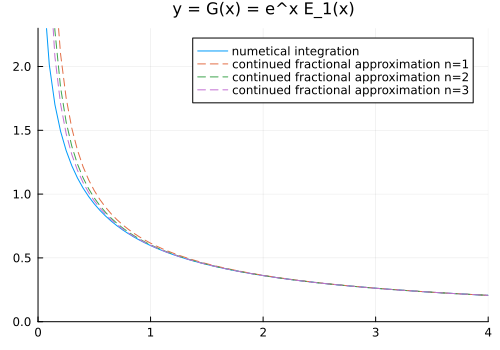

In [9]:
x = 0.05:0.05:4
@time y = G.(x)
@time y_cf1 = G_cf.(x, n=1)
@time y_cf2 = G_cf.(x, n=2)
@time y_cf3 = G_cf.(x, n=3)
plot(size=(500,350))
plot!(title="y = G(x) = e^x E_1(x)", titlefontsize=11)
plot!(xlims=(0,maximum(x)), ylims=(0,2.3))
plot!(x, y, label="numetical integration")
plot!(x, y_cf1, label="continued fractional approximation n=1", ls=:dash)
plot!(x, y_cf2, label="continued fractional approximation n=2", ls=:dash)
plot!(x, y_cf3, label="continued fractional approximation n=3", ls=:dash)